# Assignment 2: Text Classification

## Data Preprocessing

In [1]:
import json
import csv
import datetime

# Initialize an empty list to store processed entries
processed_data = []

# Read the JSON file and process each line
with open('News_Category_Dataset_IS_course.json', 'r') as file:
    for line in file:
        # Parse the JSON data for each line
        entry = json.loads(line)

        # Extract relevant information
        link = entry["link"]
        headline = entry["headline"]
        category = entry["category"]
        short_description = entry["short_description"]
        authors = entry["authors"]
        
        # Convert the date from milliseconds to a human-readable format
        date = entry["date"]
        formatted_date = datetime.datetime.utcfromtimestamp(date / 1000.0).strftime('%Y-%m-%d %H:%M:%S')

        # Store the processed entry in the list
        processed_entry = {
            "link": link,
            "headline": headline,
            "category": category,
            "short_description": short_description,
            "authors": authors,
            "date": formatted_date
        }
        processed_data.append(processed_entry)

# Write processed data to a CSV file
csv_file_path = 'processed_data.csv'
fieldnames = ["link", "headline", "category", "short_description", "authors", "date"]

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write header
    writer.writeheader()
    
    # Write data
    for entry in processed_data:
        writer.writerow(entry)

In [2]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
df = pd.read_csv('processed_data.csv')
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23 00:00:00
1,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23 00:00:00
2,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20 00:00:00
3,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",NaN,2022-09-20 00:00:00
4,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,NaN,2022-09-19 00:00:00
...,...,...,...,...,...,...
148117,https://www.huffingtonpost.com/entry/girl-with...,'Girl With the Dragon Tattoo' India Release Ca...,ENTERTAINMENT,"""Sony Pictures will not be releasing The Girl ...",NaN,2012-01-28 00:00:00
148118,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",NaN,2012-01-28 00:00:00
148119,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",NaN,2012-01-28 00:00:00
148120,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,NaN,2012-01-28 00:00:00


In [3]:
df.describe()

,link,headline,category,short_description,authors,date
count,148122,147388,148122,135938,123706,148122
unique,148096,146295,15,133792,19633,3618
top,https://www.huffingtonpost.comhttp://www.newre...,Sunday Roundup,POLITICS,Welcome to the HuffPost Rise Morning Newsbrief...,Lee Moran,2014-11-05 00:00:00
freq,2,90,35602,191,2058,98


In [4]:
(df.groupby('category')["short_description"].count() / sum(df.groupby('category')["short_description"].count())).sort_values(ascending=False)

category
POLITICS          0.237336
WELLNESS          0.131369
ENTERTAINMENT     0.108138
STYLE & BEAUTY    0.071783
TRAVEL            0.069002
PARENTING         0.064346
FOOD & DRINK      0.046308
QUEER VOICES      0.041019
HEALTHY LIVING    0.038554
BUSINESS          0.037583
COMEDY            0.034016
SPORTS            0.032331
HOME & LIVING     0.031595
BLACK VOICES      0.030558
PARENTS           0.026063
Name: short_description, dtype: float64

In [5]:
# Check for missing data in each column
missing_data = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Data Summary:")
print(missing_data)

Missing Data Summary:
link                     0
headline               734
category                 0
short_description    12184
authors              24416
date                     0
dtype: int64


We are not removing the data that has missing short_description and author, since they are a big fraction of it.

In [6]:
# Check the dta types of columns
df.dtypes

link                 object
headline             object
category             object
short_description    object
authors              object
date                 object
dtype: object

In [7]:
# Convert everything but date to string
df['link'] = df['link'].astype("string")
df['headline'] = df['headline'].astype("string")
df['category'] = df['category'].astype("string")
df['short_description'] = df['short_description'].astype("string")
df['authors'] = df['authors'].astype("string")

## Tokenization


In [7]:
#%pip install nltk

In [8]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Download necessary resources (if not already downloaded)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Initialize Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [9]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())  # Convert text to lowercase

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [word.translate(table) for word in words if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Stemming (uncomment if you want to use stemming)
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    preprocessed_text = ' '.join(lemmatized_words)
    return preprocessed_text

In [10]:
# Function to preprocess links (remove everything up to /entry/ and remove the '-' characters)
def preprocess_link(link):
    # Remove everything up to /entry/ if it exists
    if '/entry/' in link:
        link = link.split('/entry/')[1]
    
    #Remove everything after the first '_' character if it exists
    if '_' in link:
        link = link.split('_')[0]

    # Remove the '-' characters if they exist
    if '-' in link:
        link = link.replace('-', ' ')

    #preprocess the link text
    link = preprocess_text(link)
    return link

In [11]:
#Apply the preprocessing function to the headline column only in rows where the headline isn't missing

#df.loc[df['headline'].notnull(), 'headline'] = df.loc[df['headline'].notnull(), 'headline'].apply(preprocess_text)

In [12]:
#Apply the preprocessing to short_description and links as well
#df.loc[df['short_description'].notnull(), 'short_description'] = df.loc[df['short_description'].notnull(), 'short_description'].apply(preprocess_text)

In [13]:
#Preprocess the authors where the authors aren't missing
#df.loc[df['authors'].notnull(), 'authors'] = df.loc[df['authors'].notnull(), 'authors'].apply(preprocess_text)

In [14]:
#Preprocess the links where the links aren't missing
#df.loc[df['link'].notnull(), 'link'] = df.loc[df['link'].notnull(), 'link'].apply(preprocess_link)


In [15]:
# save the preprocessed data to a new csv file
#df.to_csv('postprocessed_data.csv', index=False)

In [16]:
df

,link,headline,category,short_description,authors,date
0,funniest tweet cat dog september,funniest tweet cat dog week,COMEDY,dog understand could eaten,elyse wanshel,2022-09-23 00:00:00
1,funniest parenting tweet,funniest tweet parent week,PARENTING,accidentally put toothpaste toddler toothbrush...,caroline bologna,2022-09-23 00:00:00
2,dodger baseball obit will,maury will shortstop dodger dy,SPORTS,maury will helped los angeles dodger win three...,beth harris ap,2022-09-20 00:00:00
3,golden globe return nbc,golden globe returning nbc january year,ENTERTAINMENT,past month hollywood effectively boycotted glo...,<NA>,2022-09-20 00:00:00
4,biden u force defend taiwan china,biden say force would defend taiwan china invaded,POLITICS,president issue vow tension china rise,<NA>,2022-09-19 00:00:00
...,...,...,...,...,...,...
148117,girl dragon tattoo india,dragon tattoo india release canceled local cen...,ENTERTAINMENT,sony picture releasing girl dragon tattoo indi...,<NA>,2012-01-28 00:00:00
148118,maria sharapova stunned victoria azarenka aust...,maria sharapova stunned victoria azarenka aust...,SPORTS,afterward azarenka effusive press normal credi...,<NA>,2012-01-28 00:00:00
148119,super bowl upset mo,giant patriot jet colt among improbable super ...,SPORTS,leading super bowl xlvi talked game could end ...,<NA>,2012-01-28 00:00:00
148120,aldon smith arrested duo,aldon smith arrested linebacker busted duo,SPORTS,correction earlier version story incorrectly s...,<NA>,2012-01-28 00:00:00


In [ ]:
original = pd.read_csv('processed_data.csv')
#compare the first 5 rows of the original and preprocessed data, each column side by side
pd.concat([original, df], axis=1).head()


,link,headline,category,short_description,authors,date,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23 00:00:00,funniest tweet cat dog september,funniest tweet cat dog week,COMEDY,dog understand could eaten,elyse wanshel,2022-09-23 00:00:00
1,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23 00:00:00,funniest parenting tweet,funniest tweet parent week,PARENTING,accidentally put toothpaste toddler toothbrush...,caroline bologna,2022-09-23 00:00:00
2,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20 00:00:00,dodger baseball obit will,maury will shortstop dodger dy,SPORTS,maury helped los angeles dodger win three worl...,beth harris ap,2022-09-20 00:00:00
3,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",NaN,2022-09-20 00:00:00,golden globe return nbc,golden globe returning nbc january year,ENTERTAINMENT,past month hollywood effectively boycotted glo...,<NA>,2022-09-20 00:00:00
4,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,NaN,2022-09-19 00:00:00,biden u force defend taiwan china,biden say force would defend taiwan china invaded,POLITICS,president issue vow tension china rise,<NA>,2022-09-19 00:00:00


In [25]:
#concatenate the link, headline, short_description, authors columns into a new column called text
df['text'] = df['link'] + ' ' + df['headline'] + ' ' + df['short_description'] + ' ' + df['authors']
df['text'] = df['text'].fillna('')
X = df['text']
y = df['category']

# Text Vectorization: Convert text data to numerical features (TF-IDF or word embeddings)

TF-IDF stands for Term Frequency-Inverse Document Frequency, a numerical statistic used in natural language processing (NLP) to evaluate the importance of a word in a document within a corpus.

Here's a breakdown of how TF-IDF works:

1. **Term Frequency (TF):** It measures how often a term (word) appears in a document. It's calculated by dividing the number of times a term appears in a document by the total number of terms in that document. The idea is that the more frequent a term is in a document, the more important it might be.
$$
  \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} 
 $$

2. **Inverse Document Frequency (IDF):** This part of the formula measures the significance of a term across a collection of documents (corpus). It penalizes the words that appear too frequently across documents and gives more weight to terms that are rare in the corpus. It's calculated as the logarithm of the ratio between the total number of documents and the number of documents containing the term, then adding 1 to avoid division by zero.

   $$  \text{IDF}(t, D) = \log{\left(\frac{\text{Total number of documents in corpus } D}{\text{Number of documents containing term } t}\right)} + 1 $$

3. **TF-IDF:** This is the product of TF and IDF. It gives a high weight to terms that are frequent in a specific document but relatively rare in the entire corpus. Terms that occur frequently across all documents get lower weights.

   $$  \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)  $$

Using TF-IDF, you can represent each document as a numerical vector where each dimension represents a term and its importance in that document. This technique is widely used in information retrieval, text mining, and search engine optimization, helping to determine the relevance of a document to a query or to analyze the significance of terms within documents.

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=50000)  # Use TF-IDF vectorizer for text to numerical feature conversion
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

<118497x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 1890786 stored elements in Compressed Sparse Row format>

Logistic Regression Accuracy: 0.6937383966244726


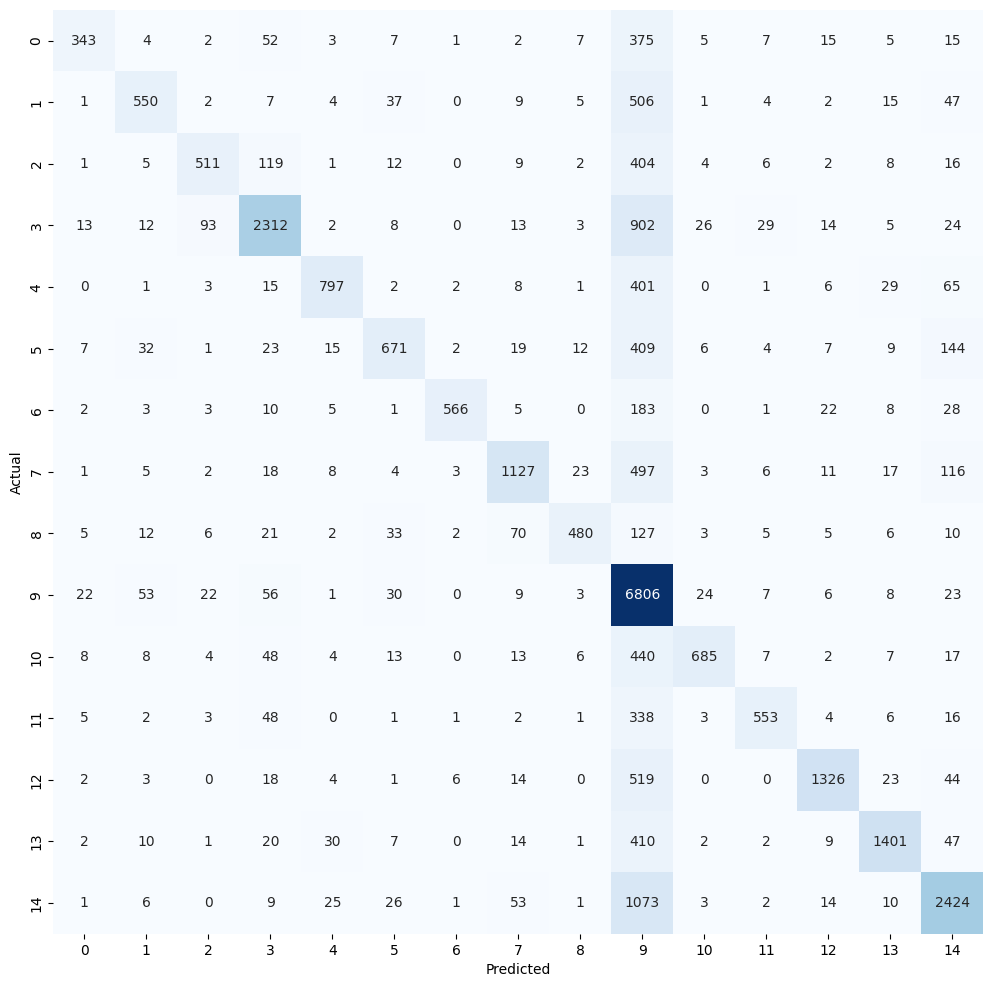

In [24]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vec, y_train)
logistic_predictions = logistic_model.predict(X_test_vec)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

#print confusion matrix for logistic regression model
cm = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#Hyperparameter tuning for logistic regression model
# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga'] # Solver
}

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,  # Reduced number of trees
    min_samples_leaf=2,  # More samples at each leaf
    bootstrap=True,   # Enable bootstrapping
    n_jobs=-1         # Use all available cores
)
rf_model.fit(X_train_vec, y_train)
rf_predictions = rf_model.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

#print confusion matrix for rf model
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(12, 12))


In [ ]:
# Example: Hyperparameter tuning for RandomForest
rf_params = {
    'n_estimators': [200, 300],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=0, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X_train_vec, y_train)

# Best parameters and score
print("Best Parameters:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)

# Evaluate on test set
y_pred = rf_grid.predict(X_test_vec)
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 